Center: 329.28932188134524, 929.2893218813452
corners: [[ 187.86796564  929.28932188]
 [ 329.28932188  787.86796564]
 [ 470.71067812  929.28932188]
 [ 329.28932188 1070.71067812]]
rotation_matrix: [[ 7.07106781e-01 -7.07106781e-01  7.53553375e+02]
 [ 7.07106781e-01  7.07106781e-01  3.93398345e+01]]


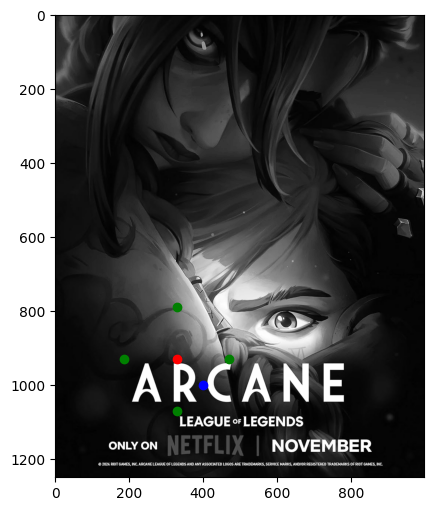

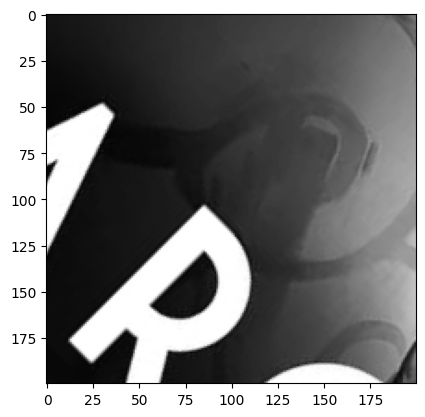

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_rotated_square(image, point, angle, side_length):
    """
    Wycina z obrazu kwadrat o zadanej rotacji i środku na boku w danym punkcie.

    Args:
        image (numpy.ndarray): Obraz wejściowy (czarno-biały lub kolorowy).
        point (tuple): Koordynaty punktu (x, y) określające środek boku kwadratu.
        angle (float): Kąt rotacji kwadratu w stopniach (zgodnie z ruchem wskazówek zegara).
        side_length (int): Długość boku kwadratu.

    Returns:
        numpy.ndarray: Wycięty kwadratowy fragment obrazu.
    """
    # zmień rozmiar plotu na 10x10
    plt.figure(figsize=(6, 6))
    # Środek kwadratu na podstawie punktu i kąta
    x, y = point
    half_side = side_length / 2
    plt.scatter(x, y, c='b')

    # Obliczamy wektor przesunięcia od środka boku do środka kwadratu
    offset_x = -half_side * np.sin(np.radians(angle))
    offset_y = -half_side * np.cos(np.radians(angle))

    # Środek kwadratu w układzie obrazu
    center_x = x + offset_x
    center_y = y + offset_y
    print(f'Center: {center_x}, {center_y}')
    plt.scatter(center_x, center_y, c='r')

    # rogi kwadratu
    corners = np.array([
                         [center_x + offset_x + offset_y, center_y + offset_y - offset_x],
                         [center_x + offset_x - offset_y, center_y + offset_y + offset_x],
                         [center_x - offset_x - offset_y, center_y - offset_y + offset_x],
                         [center_x - offset_x + offset_y, center_y - offset_y - offset_x],
                        ])
    print(f'corners: {corners}')
    plt.scatter(corners[:, 0], corners[:, 1], c='g')

    # Definicja macierzy rotacji dla wycięcia
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), 360 - angle, 1.0)
    print(f'rotation_matrix: {rotation_matrix}')
    # Obracamy obraz wokół środka kwadratu
    height, width = image.shape[:2]
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    # Współrzędne narożników kwadratu po obrocie
    start_x = int(center_x - half_side)
    start_y = int(center_y - half_side)
    end_x = int(center_x + half_side)
    end_y = int(center_y + half_side)

    # Wycinamy kwadrat z obróconego obrazu
    cropped_square = rotated_image[start_y:end_y, start_x:end_x]

    plt.imshow(image, cmap='gray')
    plt.show()

    return cropped_square

# Przykład użycia:
# Wczytaj obraz w skali szarości
image = cv2.imread('example_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

point = (400, 1000)  # Punkt (x, y)
angle = 45        # Rotacja w stopniach
side_length = 200    # Długość boku kwadratu

# Wycięcie kwadratu
rotated_square = extract_rotated_square(image, point, angle, side_length)

plt.imshow(rotated_square, cmap='gray')
plt.show()
